## Processing the data

In [10]:
cd IRP

/Users/milliemccallum/Documents/IRP


In [22]:
import pandas as pd
import os

csv_directory = "Data/Census_2021/raw_data/"

# create a list for all of the census CSVs to be used for the directory 
csv_files = [file for file in os.listdir(csv_directory) if file.endswith(".csv")]

# Create an empty dataframe to put the merged set of csvs into
merged_data = pd.DataFrame()

# read the csvs and merge them
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file) 
    df_csv = pd.read_csv(csv_path, low_memory=False) 
    merged_data = pd.concat([merged_data, df_csv], axis=1)

merged_data.to_csv("Data/Census_2021/merged_data.csv")
merged_data.head()

,date,geography,geography code,Household size: Total: All household spaces; measures: Value,Household size: 0 people in household; measures: Value,Household size: 1 person in household; measures: Value,Household size: 2 people in household; measures: Value,Household size: 3 people in household; measures: Value,Household size: 4 people in household; measures: Value,Household size: 5 people in household; measures: Value,...,Age: Aged 75 to 79 years,Age: Aged 80 to 84 years,Age: Aged 85 years and over,date,geography,geography code,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked
0,2021,City of London 001A,E01000001,838,0,371,350,70,41,6,...,57,57,35,2021,City of London 001A,E01000001,486,83,346,57
1,2021,City of London 001B,E01000002,824,0,409,315,62,32,5,...,59,43,30,2021,City of London 001B,E01000002,418,52,286,80
2,2021,City of London 001C,E01000003,1015,0,582,323,72,30,7,...,50,31,33,2021,City of London 001C,E01000003,504,105,331,68
3,2021,City of London 001E,E01000005,479,0,219,121,51,44,25,...,17,14,12,2021,City of London 001E,E01000005,463,73,165,225
4,2021,Barking and Dagenham 016A,E01000006,556,0,94,127,104,99,62,...,18,17,16,2021,Barking and Dagenham 016A,E01000006,544,78,223,243


In [23]:
# filter for data only for London 

import geopandas as gpd

lsoa_london_path = "Data/Boundaries /LSOA_2011_London_gen_MHW.shp"
lsoa = gpd.read_file(lsoa_london_path)
lsoa.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [25]:
# merge lsoa data with census and IMD data so these are just for London

csv_path = "Data/Census_2021/merged_data.csv"
csv_data = pd.read_csv(csv_path, low_memory=False)

merged_data = lsoa.merge(csv_data, left_on='LSOA11CD', right_on='geography code', how='left')
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Age: Aged 75 to 79 years,Age: Aged 80 to 84 years,Age: Aged 85 years and over,date.13,geography.13,geography code.13,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,57.0,57.0,35.0,2021.0,City of London 001A,E01000001,486.0,83.0,346.0,57.0
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,59.0,43.0,30.0,2021.0,City of London 001B,E01000002,418.0,52.0,286.0,80.0
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,50.0,31.0,33.0,2021.0,City of London 001C,E01000003,504.0,105.0,331.0,68.0
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,17.0,14.0,12.0,2021.0,City of London 001E,E01000005,463.0,73.0,165.0,225.0
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,18.0,17.0,16.0,2021.0,Barking and Dagenham 016A,E01000006,544.0,78.0,223.0,243.0


In [27]:
data_lsoa = merged_data.to_csv("Data/data_lsoa.csv", index=False)

## Understanding the dataset

In [65]:
data_lsoa = pd.read_csv("Data/data_lsoa.csv", low_memory=False)
list(data_lsoa.columns)

['LSOA11CD',
 'LSOA11NM',
 'MSOA11CD',
 'MSOA11NM',
 'LAD11CD',
 'LAD11NM',
 'RGN11CD',
 'RGN11NM',
 'USUALRES',
 'HHOLDRES',
 'COMESTRES',
 'POPDEN',
 'HHOLDS',
 'AVHHOLDSZ',
 'geometry',
 'Unnamed: 0',
 'date',
 'geography',
 'geography code',
 'Household size: Total: All household spaces; measures: Value',
 'Household size: 0 people in household; measures: Value',
 'Household size: 1 person in household; measures: Value',
 'Household size: 2 people in household; measures: Value',
 'Household size: 3 people in household; measures: Value',
 'Household size: 4 people in household; measures: Value',
 'Household size: 5 people in household; measures: Value',
 'Household size: 6 people in household; measures: Value',
 'Household size: 7 people in household; measures: Value',
 'Household size: 8 or more people in household; measures: Value',
 'date.1',
 'geography.1',
 'geography code.1',
 'Occupancy rating for bedrooms: Total: All households',
 'Occupancy rating for bedrooms: Occupancy ra

In [30]:
data_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Columns: 212 entries, LSOA11CD to Unemployment history: Not in employment: Never worked
dtypes: float64(167), int64(4), object(41)
memory usage: 7.8+ MB


In [31]:
data_lsoa.shape

(4835, 212)

In [32]:
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Age: Aged 75 to 79 years,Age: Aged 80 to 84 years,Age: Aged 85 years and over,date.13,geography.13,geography code.13,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,57.0,57.0,35.0,2021.0,City of London 001A,E01000001,486.0,83.0,346.0,57.0
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,59.0,43.0,30.0,2021.0,City of London 001B,E01000002,418.0,52.0,286.0,80.0
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,50.0,31.0,33.0,2021.0,City of London 001C,E01000003,504.0,105.0,331.0,68.0
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,17.0,14.0,12.0,2021.0,City of London 001E,E01000005,463.0,73.0,165.0,225.0
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,18.0,17.0,16.0,2021.0,Barking and Dagenham 016A,E01000006,544.0,78.0,223.0,243.0


## processing green space data

In [35]:
# merge all of the green space shp into one 

SP_shp = gpd.read_file("Data/Green space/SP_GreenspaceSite.shp")
SU_shp = gpd.read_file("Data/Green space/SU_GreenspaceSite.shp")
TL_shp = gpd.read_file("Data/Green space/TL_GreenspaceSite.shp")
TQ_shp = gpd.read_file("Data/Green space/TQ_GreenspaceSite.shp")

green_space = gpd.GeoDataFrame(pd.concat([SP_shp, SU_shp, TL_shp, TQ_shp], ignore_index=True))
green_space.to_file("Data/Green space/green_space.shp")

In [36]:
# clip to the extent of london

London_shp = gpd.read_file("Data/Boundaries /London_GLA_Boundary.shp")

gs_london = London_shp.clip(green_space)

<Axes: >

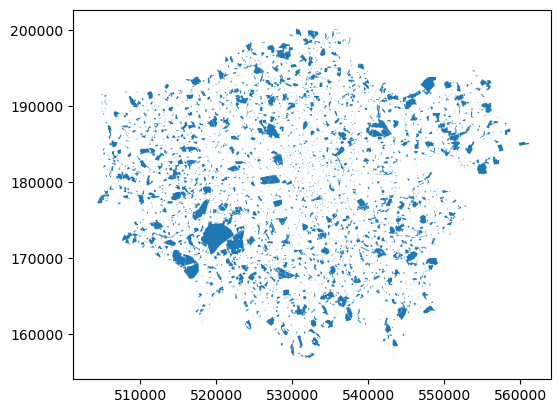

In [37]:
gs_london.plot()

In [48]:
# To calculate the percentage of green space in each LSOA:
# Clip the Green space to the boundaries of LSOAs
gs_in_lsoa = gpd.overlay(gs_london, merged_data, how="intersection")

# Calculate the area of green space in each polygon
gs_in_lsoa["green_area"] = gs_in_lsoa.geometry.area

/var/folders/d1/m4w3nsnj6k5_lmftsj71l4j40000gn/T/ipykernel_40433/1504914333.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  gs_in_lsoa = gpd.overlay(gs_london, merged_data, how="intersection")


In [51]:
# calculate the total area of each LSOA:
merged_data["lsoa_area"] = merged_data.geometry.area

In [53]:
# Calculating the sum of green area in each LSOA
green_area_sum = gs_in_lsoa.groupby("LSOA11CD")["green_area"].sum().reset_index()
green_area_sum.columns = ["LSOA11CD", "total_green_area"]

In [57]:
# Merge with LSOA GeoDataFrame
merged_data = merged_data.merge(green_area_sum, on="LSOA11CD", how="left")

# Fill missing values with 0 (in case some LSOAs have no green space)
merged_data["total_green_area"] = merged_data["total_green_area"].fillna(0)

# Calculate percentage
merged_data["percent_green"] = (merged_data["total_green_area"] / merged_data["lsoa_area"]) * 100

In [62]:
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,geography.13,geography code.13,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked,lsoa_area,total_green_area,percent_green,centroid
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,City of London 001A,E01000001,486.0,83.0,346.0,57.0,133320.768859,3184.667649,2.388726,POINT (532150.879 181615.038)
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,City of London 001B,E01000002,418.0,52.0,286.0,80.0,226191.273063,3059.542050,1.352635,POINT (532443.354 181645.862)
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,City of London 001C,E01000003,504.0,105.0,331.0,68.0,57302.966528,5222.597453,9.114009,POINT (532207.062 182030.087)
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,City of London 001E,E01000005,463.0,73.0,165.0,225.0,190738.760508,2158.219915,1.131506,POINT (533618.591 181157.119)
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,Barking and Dagenham 016A,E01000006,544.0,78.0,223.0,243.0,144195.846859,0.000000,0.000000,POINT (544934.368 184297.551)


In [66]:
# Area of green space within 300m buffer of LSOA centroids

# calculate centroids of each LSOA
merged_data["centroid"] = merged_data.geometry.centroid
lsoas_centroids = merged_data.set_geometry("centroid")

In [75]:
# Buffer the centroids by 300 meters
lsoas_centroids["buffer_300m"] = lsoas_centroids.geometry.buffer(300)
lsoas_buffers = lsoas_centroids.set_geometry("buffer_300m")

# Perform spatial intersection: only green space inside buffers
green_in_buffer = gpd.overlay(lsoas_buffers, gs_london, how="intersection")

# Calculate area of intersected green space polygons
green_in_buffer["green_area_300m"] = green_in_buffer.geometry.area


/var/folders/d1/m4w3nsnj6k5_lmftsj71l4j40000gn/T/ipykernel_40433/3284117516.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...
Right CRS: EPSG:27700

  green_in_buffer = gpd.overlay(lsoas_buffers, gs_london, how="intersection")


In [80]:
# Group by LSOA code and sum the green space area within buffer
green_area_by_lsoa = green_in_buffer.groupby("LSOA11CD")["green_area_300m"].sum().reset_index()
green_area_by_lsoa.columns = ["LSOA11CD", "green_area_300m"]

In [82]:
# Merge green area results back to original LSOA GeoDataFrame
merged_data = merged_data.merge(green_area_by_lsoa, on="LSOA11CD", how="left")
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked,lsoa_area,total_green_area,percent_green,centroid,green_area_300m_x,green_area_300m_y,green_area_300m
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,83.0,346.0,57.0,133320.768859,3184.667649,2.388726,POINT (532150.879 181615.038),NaN,7723.947100,7723.947100
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,52.0,286.0,80.0,226191.273063,3059.542050,1.352635,POINT (532443.354 181645.862),NaN,3062.904395,3062.904395
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,105.0,331.0,68.0,57302.966528,5222.597453,9.114009,POINT (532207.062 182030.087),NaN,14471.092750,14471.092750
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,73.0,165.0,225.0,190738.760508,2158.219915,1.131506,POINT (533618.591 181157.119),NaN,1425.501400,1425.501400
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,78.0,223.0,243.0,144195.846859,0.000000,0.000000,POINT (544934.368 184297.551),NaN,692.331600,692.331600


In [83]:
# Fill NaNs (where no green space is within 300m) with 0
merged_data["green_area_300m"] = merged_data["green_area_300m"].fillna(0)

In [84]:
merged_data.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked,lsoa_area,total_green_area,percent_green,centroid,green_area_300m_x,green_area_300m_y,green_area_300m
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,83.0,346.0,57.0,133320.768859,3184.667649,2.388726,POINT (532150.879 181615.038),NaN,7723.947100,7723.947100
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,52.0,286.0,80.0,226191.273063,3059.542050,1.352635,POINT (532443.354 181645.862),NaN,3062.904395,3062.904395
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,105.0,331.0,68.0,57302.966528,5222.597453,9.114009,POINT (532207.062 182030.087),NaN,14471.092750,14471.092750
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,73.0,165.0,225.0,190738.760508,2158.219915,1.131506,POINT (533618.591 181157.119),NaN,1425.501400,1425.501400
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,78.0,223.0,243.0,144195.846859,0.000000,0.000000,POINT (544934.368 184297.551),NaN,692.331600,692.331600


In [85]:
merged_data.drop(['green_area_300m_x', 'green_area_300m_y'], axis=1)

# This shows how much green space in m^2 there is within 300m of the 
# centroid buffer 

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,geography code.13,Unemployment history: Total: All usual residents aged 16 years and over not in employment the week before the census,Unemployment history: Not in employment: Worked in the last 12 months,Unemployment history: Not in employment: Not worked in the last 12 months,Unemployment history: Not in employment: Never worked,lsoa_area,total_green_area,percent_green,centroid,green_area_300m
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,E01000001,486.0,83.0,346.0,57.0,1.333208e+05,3184.667649,2.388726,POINT (532150.879 181615.038),7723.947100
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,E01000002,418.0,52.0,286.0,80.0,2.261913e+05,3059.542050,1.352635,POINT (532443.354 181645.862),3062.904395
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,E01000003,504.0,105.0,331.0,68.0,5.730297e+04,5222.597453,9.114009,POINT (532207.062 182030.087),14471.092750
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,E01000005,463.0,73.0,165.0,225.0,1.907388e+05,2158.219915,1.131506,POINT (533618.591 181157.119),1425.501400
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,E01000006,544.0,78.0,223.0,243.0,1.441958e+05,0.000000,0.000000,POINT (544934.368 184297.551),692.331600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,...,E01033742,259.0,54.0,103.0,102.0,1.233092e+05,0.000000,0.000000,POINT (544581.697 179602.539),0.000000
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,...,E01033743,550.0,112.0,208.0,230.0,1.004853e+06,56775.267399,5.650106,POINT (545763.532 180611.459),0.000000
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,...,E01033744,489.0,84.0,224.0,181.0,1.522620e+05,0.000000,0.000000,POINT (544541.222 179300.528),0.000000
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,...,E01033745,441.0,74.0,180.0,187.0,5.584777e+05,8015.530303,1.435246,POINT (546171.331 180005.443),0.000000


## Variable selection